# Import the libraries and Datasets

In [177]:
# Import the libraries
import numpy as np
import pandas as pd
from datetime import datetime

In [178]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

In [179]:
# Read the CSVs into dataframes
trips = pd.read_csv('austin_bikeshare_trips.csv')
stations = pd.read_csv('austin_bikeshare_stations.csv')

In [180]:
trips.head(3)

,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,month,start_station_id,start_station_name,start_time,subscriber_type,trip_id,year
0,8.0,19:12:00,41,2565.0,Trinity & 6th Street,3.0,2536.0,Waller & 6th St.,2015-03-19 19:12:00,Walk Up,9900082882,2015.0
1,141.0,2:06:04,6,2570.0,South Congress & Academy,10.0,2494.0,2nd & Congress,2016-10-30 02:06:04,Local365,12617682,2016.0
2,578.0,16:28:27,13,2498.0,Convention Center / 4th St. @ MetroRail,3.0,2538.0,Bullock Museum @ Congress & MLK,2016-03-11 16:28:27,Local365,9075366,2016.0


In [181]:
# Create a column which takes the Start time as a datetime object
trips['Exact Time']=pd.to_datetime(arg= trips['start_time'], yearfirst = True, format='%Y-%m-%d', box = False)

In [182]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649231 entries, 0 to 649230
Data columns (total 13 columns):
bikeid                648508 non-null float64
checkout_time         649231 non-null object
duration_minutes      649231 non-null int64
end_station_id        629389 non-null float64
end_station_name      649231 non-null object
month                 618479 non-null float64
start_station_id      630190 non-null float64
start_station_name    649231 non-null object
start_time            649231 non-null object
subscriber_type       647154 non-null object
trip_id               649231 non-null int64
year                  618479 non-null float64
Exact Time            649231 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(2), object(5)
memory usage: 64.4+ MB


In [183]:
trips = trips.astype({'end_station_name':str, 'start_station_name': str, 'subscriber_type':str})

In [184]:
# drop the start time column because it is the same as Exact Time column
trips.drop(labels='start_time', inplace=True, axis =1)

In [185]:
# Check the station dataset
stations.head()

,latitude,location,longitude,name,station_id,status
0,30.27041,(30.27041 -97.75046),-97.75046,West & 6th St.,2537,active
1,30.26452,(30.26452 -97.7712),-97.77120,Barton Springs Pool,2572,active
2,30.27595,(30.27595 -97.74739),-97.74739,ACC - Rio Grande & 12th,2545,closed
3,30.28480,(30.2848 -97.72756),-97.72756,Red River & LBJ Library,1004,closed
4,30.26694,(30.26694 -97.74939),-97.74939,Nueces @ 3rd,1008,moved


In [186]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 6 columns):
latitude      72 non-null float64
location      72 non-null object
longitude     72 non-null float64
name          72 non-null object
station_id    72 non-null int64
status        72 non-null object
dtypes: float64(2), int64(1), object(3)
memory usage: 3.5+ KB


In [187]:
stations = stations.astype(dtype = {'location':list , 'name':str , 'status':str})

# Data cleaning

The dataset contains some missing values which need to be plugged before data visualization can be done.

In [188]:
trips.isnull().sum()

bikeid                  723
checkout_time             0
duration_minutes          0
end_station_id        19842
end_station_name          0
month                 30752
start_station_id      19041
start_station_name        0
subscriber_type           0
trip_id                   0
year                  30752
Exact Time                0
dtype: int64

## Determine the Name of the day of the week

In [189]:
# Creates a list of the weekday values 
# Monday would have a value of 0 and counts down to Sunday having a value of 6
Day_Of_Week = []
for row in trips['Exact Time']:
    # The lambda function below generates the weekday based on the datetime object
    f = lambda row: row.weekday() 
    Day_Of_Week.append(f(row)) # appends the weekday to the list in order
    

In [190]:
# Creates a new column based on the list created previously
# Monday would have a value of 0, counting down to a value of 6 for Sunday
trips['Day of week'] = Day_Of_Week

In [191]:
# According to the documentation for the weekday() method, Monday = 0, Sunday = 6
weekday = [0,1,2,3,4,5,6]
name_day =['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a dictionary which would map the name of the day of the week to a number
Day_week_dict = {}
for week,name in zip(weekday,name_day):
    Day_week_dict[week] = name

In [192]:
# Display the dictionary
Day_week_dict

{0: 'Monday',
 1: 'Tuesday',
 2: 'Wednesday',
 3: 'Thursday',
 4: 'Friday',
 5: 'Saturday',
 6: 'Sunday'}

In [193]:
# Create a new column
trips['Name of Day of Week'] = np.nan

In [194]:
test = lambda row: Day_week_dict[row]
trips['Name of Day of Week'] = trips['Day of week'].apply(func = test)

In [195]:
trips.head()

,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,month,start_station_id,start_station_name,subscriber_type,trip_id,year,Exact Time,Day of week,Name of Day of Week
0,8.0,19:12:00,41,2565.0,Trinity & 6th Street,3.0,2536.0,Waller & 6th St.,Walk Up,9900082882,2015.0,2015-03-19 19:12:00,3,Thursday
1,141.0,2:06:04,6,2570.0,South Congress & Academy,10.0,2494.0,2nd & Congress,Local365,12617682,2016.0,2016-10-30 02:06:04,6,Sunday
2,578.0,16:28:27,13,2498.0,Convention Center / 4th St. @ MetroRail,3.0,2538.0,Bullock Museum @ Congress & MLK,Local365,9075366,2016.0,2016-03-11 16:28:27,4,Friday
3,555.0,15:12:00,80,2712.0,Toomey Rd @ South Lamar,11.0,2497.0,Capitol Station / Congress & 11th,24-Hour Kiosk (Austin B-cycle),9900319298,2014.0,2014-11-23 15:12:00,6,Sunday
4,86.0,15:39:13,25,3377.0,MoPac Pedestrian Bridge @ Veterans Drive,4.0,2707.0,Rainey St @ Cummings,Walk Up,14468597,2017.0,2017-04-16 15:39:13,6,Sunday


## Extract the year, month, day, hour and minute from the datetime object

In [196]:
def create_columns(df,ref_column_name = 'Exact Time'):
    """
    This function creates columns based on the Exact Time column in a bid to extract more details from the datetime object
    and also to deal with the missing values in the Year and Month columns.
    The reference column is the Exact Time column.
    
    """
    # Create empty lists for year, month, day, hour and minutes of the point in which the bicycle is rented
    year = []
    month = []
    day = []
    hour = []
    mins = []
    
    # Iterates through the column and appends the respective values to the different lists
    for row in df[ref_column_name]:
        year.append(row.year)
        month.append(row.month)
        day.append(row.day)
        hour.append(row.hour)
        mins.append(row.minute)
        
    # Create new columns based on the lists created above    
    column_names = ['Year', 'Month', 'Day', 'Hour of day', 'Minute of hour'] # names of new columns that would be created
    values = [year,month,day,hour,mins] # creates list of lists
    for column_name, value in zip(column_names,values):
        df[column_name] = np.array(value) 
        
    return df
    
    

In [197]:
trips = create_columns(df=trips)

In [198]:
trips.head(5)

,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,month,start_station_id,start_station_name,subscriber_type,trip_id,year,Exact Time,Day of week,Name of Day of Week,Year,Month,Day,Hour of day,Minute of hour
0,8.0,19:12:00,41,2565.0,Trinity & 6th Street,3.0,2536.0,Waller & 6th St.,Walk Up,9900082882,2015.0,2015-03-19 19:12:00,3,Thursday,2015,3,19,19,12
1,141.0,2:06:04,6,2570.0,South Congress & Academy,10.0,2494.0,2nd & Congress,Local365,12617682,2016.0,2016-10-30 02:06:04,6,Sunday,2016,10,30,2,6
2,578.0,16:28:27,13,2498.0,Convention Center / 4th St. @ MetroRail,3.0,2538.0,Bullock Museum @ Congress & MLK,Local365,9075366,2016.0,2016-03-11 16:28:27,4,Friday,2016,3,11,16,28
3,555.0,15:12:00,80,2712.0,Toomey Rd @ South Lamar,11.0,2497.0,Capitol Station / Congress & 11th,24-Hour Kiosk (Austin B-cycle),9900319298,2014.0,2014-11-23 15:12:00,6,Sunday,2014,11,23,15,12
4,86.0,15:39:13,25,3377.0,MoPac Pedestrian Bridge @ Veterans Drive,4.0,2707.0,Rainey St @ Cummings,Walk Up,14468597,2017.0,2017-04-16 15:39:13,6,Sunday,2017,4,16,15,39


In [199]:
# Drop the month and year column since they are duplicated
trips.drop(inplace = True, axis = 1, labels = ['month', 'year'])

In [200]:
# Check for missing values
trips.isnull().sum()

bikeid                   723
checkout_time              0
duration_minutes           0
end_station_id         19842
end_station_name           0
start_station_id       19041
start_station_name         0
subscriber_type            0
trip_id                    0
Exact Time                 0
Day of week                0
Name of Day of Week        0
Year                       0
Month                      0
Day                        0
Hour of day                0
Minute of hour             0
dtype: int64

In [201]:
trips.head(3)

,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,start_station_id,start_station_name,subscriber_type,trip_id,Exact Time,Day of week,Name of Day of Week,Year,Month,Day,Hour of day,Minute of hour
0,8.0,19:12:00,41,2565.0,Trinity & 6th Street,2536.0,Waller & 6th St.,Walk Up,9900082882,2015-03-19 19:12:00,3,Thursday,2015,3,19,19,12
1,141.0,2:06:04,6,2570.0,South Congress & Academy,2494.0,2nd & Congress,Local365,12617682,2016-10-30 02:06:04,6,Sunday,2016,10,30,2,6
2,578.0,16:28:27,13,2498.0,Convention Center / 4th St. @ MetroRail,2538.0,Bullock Museum @ Congress & MLK,Local365,9075366,2016-03-11 16:28:27,4,Friday,2016,3,11,16,28


## Start and End Station ID adjustment

In [202]:
stations.head()

,latitude,location,longitude,name,station_id,status
0,30.27041,(30.27041 -97.75046),-97.75046,West & 6th St.,2537,active
1,30.26452,(30.26452 -97.7712),-97.77120,Barton Springs Pool,2572,active
2,30.27595,(30.27595 -97.74739),-97.74739,ACC - Rio Grande & 12th,2545,closed
3,30.28480,(30.2848 -97.72756),-97.72756,Red River & LBJ Library,1004,closed
4,30.26694,(30.26694 -97.74939),-97.74939,Nueces @ 3rd,1008,moved


In [203]:
Names = list(stations['name'])
ID = list(stations['station_id'])

In [204]:
ID_dict = {}
for name, idnum in zip(Names,ID):
    ID_dict[name]= idnum

In [205]:
ID_dict

{'11th & San Jacinto': 3291,
 '13th & San Antonio': 3635,
 '17th & Guadalupe': 2540,
 '2nd & Congress': 2494,
 '3rd & West': 2552,
 '4th & Congress': 2495,
 '5th & Bowie': 2501,
 '5th & San Marcos': 2564,
 '6th & Congress': 3619,
 '6th & Navasota St.': 1002,
 '8th & Congress': 2496,
 '8th & Guadalupe': 1003,
 'ACC - Rio Grande & 12th': 2545,
 'ACC - West & 12th Street': 2546,
 'Barton Springs & Riverside': 2502,
 'Barton Springs @ Kinney Ave': 2711,
 'Barton Springs Pool': 2572,
 'Boardwalk West': 3687,
 'Brazos & 6th': 3390,
 'Bullock Museum @ Congress & MLK': 2538,
 'Capital Metro HQ - East 5th at Broadway': 2823,
 'Capitol Station / Congress & 11th': 2497,
 'City Hall / Lavaca & 2nd': 2499,
 'Congress & Cesar Chavez': 3684,
 'Convention Center / 3rd & Trinity': 2539,
 'Convention Center / 4th St. @ MetroRail': 2498,
 'Davis at Rainey Street': 2563,
 'East 11th St. & San Marcos': 2569,
 'East 11th St. at Victory Grill': 2568,
 'East 2nd & Pedernales': 3293,
 'East 4th & Chicon': 3292

In [206]:
trips.isnull().sum()

bikeid                   723
checkout_time              0
duration_minutes           0
end_station_id         19842
end_station_name           0
start_station_id       19041
start_station_name         0
subscriber_type            0
trip_id                    0
Exact Time                 0
Day of week                0
Name of Day of Week        0
Year                       0
Month                      0
Day                        0
Hour of day                0
Minute of hour             0
dtype: int64

In [207]:
test = trips[['start_station_id','start_station_name']]

In [208]:
# show the rows with missing values for start station id
dfmiss_start_id= test[test['start_station_id'].isnull()]

In [209]:
dfmiss_start_id

,start_station_id,start_station_name
58,NaN,Zilker Park at Barton Springs & William Barton...
101,NaN,Zilker Park at Barton Springs & William Barton...
107,NaN,Zilker Park at Barton Springs & William Barton...
125,NaN,ACC - West & 12th
135,NaN,Zilker Park at Barton Springs & William Barton...
167,NaN,Zilker Park at Barton Springs & William Barton...
218,NaN,Zilker Park at Barton Springs & William Barton...
238,NaN,Convention Center/ 3rd & Trinity
260,NaN,Zilker Park at Barton Springs & William Barton...
268,NaN,Convention Center/ 3rd & Trinity


In [210]:
# get name of missing stations without ids
stations_with_missing_ids=dfmiss_start_id['start_station_name'].unique()

In [211]:
stations_with_missing_ids

array(['Zilker Park at Barton Springs & William Barton Drive',
       'ACC - West & 12th', 'Convention Center/ 3rd & Trinity',
       'MapJam at Hops & Grain Brewery', 'Red River @ LBJ Library',
       'East 11th Street at Victory Grill', 'Mobile Station @ Bike Fest',
       'Mobile Station', 'Main Office', 'MapJam at French Legation',
       'Mobile Station @ Unplugged', 'Shop', 'Re-branding',
       'MapJam at Pan Am Park', 'Marketing Event', 'Customer Service',
       'Repair Shop', 'Mobile Station @ Boardwalk Opening Ceremony',
       'MapJam at Scoot Inn'], dtype=object)

In [212]:
# Number of stations without an ID
len(stations_with_missing_ids)

19

19 stations don't have an ID, we could try to search for their values online (too difficult) or I could generate random values and assign to these stations (easier), I would go with the easy way.

What is the largest number used for station ID?

In [213]:
trips['start_station_id'].max()

3687.0

The random numbers generated would start from this max value + 1, and there would be 19 of them.

In [214]:
missing_start_ids = np.arange(start = trips['start_station_id'].max()+1 , 
                              stop = len(stations_with_missing_ids)+1+ trips['start_station_id'].max())

In [215]:
# Generate extra station IDs
missing_start_ids

array([ 3688.,  3689.,  3690.,  3691.,  3692.,  3693.,  3694.,  3695.,
        3696.,  3697.,  3698.,  3699.,  3700.,  3701.,  3702.,  3703.,
        3704.,  3705.,  3706.])

In [216]:
# lets create a new dictionary with the 19 stations and their generated ids
stations_with_missing_ids

array(['Zilker Park at Barton Springs & William Barton Drive',
       'ACC - West & 12th', 'Convention Center/ 3rd & Trinity',
       'MapJam at Hops & Grain Brewery', 'Red River @ LBJ Library',
       'East 11th Street at Victory Grill', 'Mobile Station @ Bike Fest',
       'Mobile Station', 'Main Office', 'MapJam at French Legation',
       'Mobile Station @ Unplugged', 'Shop', 'Re-branding',
       'MapJam at Pan Am Park', 'Marketing Event', 'Customer Service',
       'Repair Shop', 'Mobile Station @ Boardwalk Opening Ceremony',
       'MapJam at Scoot Inn'], dtype=object)

In [217]:
newids = list(missing_start_ids)
new_names = list(stations_with_missing_ids)
extras={}
for idno,name in zip(newids,new_names):
    extras[name]=idno
    

In [218]:
extras

{'ACC - West & 12th': 3689.0,
 'Convention Center/ 3rd & Trinity': 3690.0,
 'Customer Service': 3703.0,
 'East 11th Street at Victory Grill': 3693.0,
 'Main Office': 3696.0,
 'MapJam at French Legation': 3697.0,
 'MapJam at Hops & Grain Brewery': 3691.0,
 'MapJam at Pan Am Park': 3701.0,
 'MapJam at Scoot Inn': 3706.0,
 'Marketing Event': 3702.0,
 'Mobile Station': 3695.0,
 'Mobile Station @ Bike Fest': 3694.0,
 'Mobile Station @ Boardwalk Opening Ceremony': 3705.0,
 'Mobile Station @ Unplugged': 3698.0,
 'Re-branding': 3700.0,
 'Red River @ LBJ Library': 3692.0,
 'Repair Shop': 3704.0,
 'Shop': 3699.0,
 'Zilker Park at Barton Springs & William Barton Drive': 3688.0}

In [219]:
# lets join this generated values to the former dictionary
ID_dict.update(extras)

In [220]:
ID_dict

{'11th & San Jacinto': 3291,
 '13th & San Antonio': 3635,
 '17th & Guadalupe': 2540,
 '2nd & Congress': 2494,
 '3rd & West': 2552,
 '4th & Congress': 2495,
 '5th & Bowie': 2501,
 '5th & San Marcos': 2564,
 '6th & Congress': 3619,
 '6th & Navasota St.': 1002,
 '8th & Congress': 2496,
 '8th & Guadalupe': 1003,
 'ACC - Rio Grande & 12th': 2545,
 'ACC - West & 12th': 3689.0,
 'ACC - West & 12th Street': 2546,
 'Barton Springs & Riverside': 2502,
 'Barton Springs @ Kinney Ave': 2711,
 'Barton Springs Pool': 2572,
 'Boardwalk West': 3687,
 'Brazos & 6th': 3390,
 'Bullock Museum @ Congress & MLK': 2538,
 'Capital Metro HQ - East 5th at Broadway': 2823,
 'Capitol Station / Congress & 11th': 2497,
 'City Hall / Lavaca & 2nd': 2499,
 'Congress & Cesar Chavez': 3684,
 'Convention Center / 3rd & Trinity': 2539,
 'Convention Center / 4th St. @ MetroRail': 2498,
 'Convention Center/ 3rd & Trinity': 3690.0,
 'Customer Service': 3703.0,
 'Davis at Rainey Street': 2563,
 'East 11th St. & San Marcos': 2

In [221]:
# Create a new column for the adjusted start staion ids
trips['Start Station ID Adjusted']= np.nan

In [222]:
fixid = lambda station:ID_dict[station]

For some weird reason, a particular station "Stolen" wasn't discovered with the previous search, but gives an error if not attended to, we would assign an ID of 3707 to this mysterious station

In [223]:
ID_dict.update({'Stolen':3707})

In [224]:
trips['Start Station ID Adjusted']= trips['start_station_name'].apply(func = fixid)

In [225]:
trips.head(3)

,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,start_station_id,start_station_name,subscriber_type,trip_id,Exact Time,Day of week,Name of Day of Week,Year,Month,Day,Hour of day,Minute of hour,Start Station ID Adjusted
0,8.0,19:12:00,41,2565.0,Trinity & 6th Street,2536.0,Waller & 6th St.,Walk Up,9900082882,2015-03-19 19:12:00,3,Thursday,2015,3,19,19,12,2536.0
1,141.0,2:06:04,6,2570.0,South Congress & Academy,2494.0,2nd & Congress,Local365,12617682,2016-10-30 02:06:04,6,Sunday,2016,10,30,2,6,2494.0
2,578.0,16:28:27,13,2498.0,Convention Center / 4th St. @ MetroRail,2538.0,Bullock Museum @ Congress & MLK,Local365,9075366,2016-03-11 16:28:27,4,Friday,2016,3,11,16,28,2538.0


In [226]:
trips.tail(10)

,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,start_station_id,start_station_name,subscriber_type,trip_id,Exact Time,Day of week,Name of Day of Week,Year,Month,Day,Hour of day,Minute of hour,Start Station ID Adjusted
649221,853.0,19:38:03,15,2707.0,Rainey St @ Cummings,2501.0,5th & Bowie,Local365,13701697,2017-02-11 19:38:03,5,Saturday,2017,2,11,19,38,2501.0
649222,522.0,9:12:00,38,2572.0,Barton Springs Pool,2572.0,Barton Springs Pool,24-Hour Kiosk (Austin B-cycle),9900193160,2014-07-22 09:12:00,1,Tuesday,2014,7,22,9,12,2572.0
649223,884.0,18:12:42,8,2494.0,2nd & Congress,2549.0,Long Center @ South 1st & Riverside,Local365,9900303745,2015-10-15 18:12:42,3,Thursday,2015,10,15,18,12,2549.0
649224,347.0,11:12:00,11,2822.0,East 6th at Robert Martinez,2496.0,8th & Congress,Local365,9900338451,2014-12-13 11:12:00,5,Saturday,2014,12,13,11,12,2496.0
649225,334.0,15:56:11,16,3377.0,MoPac Pedestrian Bridge @ Veterans Drive,2575.0,Riverside @ S. Lamar,Walk Up,9917616,2016-05-09 15:56:11,0,Monday,2016,5,9,15,56,2575.0
649226,52.0,0:12:00,90,2571.0,Red River & 8th Street,2544.0,East 6th & Pedernales St.,24-Hour Kiosk (Austin B-cycle),9900185926,2014-07-06 00:12:00,6,Sunday,2014,7,6,0,12,2544.0
649227,104.0,17:20:44,53,2499.0,City Hall / Lavaca & 2nd,3619.0,6th & Congress,Walk Up,13649794,2017-02-06 17:20:44,0,Monday,2017,2,6,17,20,3619.0
649228,240.0,13:12:55,44,2495.0,4th & Congress,2495.0,4th & Congress,Walk Up,9900329990,2015-11-18 13:12:55,2,Wednesday,2015,11,18,13,12,2495.0
649229,421.0,14:45:34,106,2494.0,2nd & Congress,2494.0,2nd & Congress,Try Before You Buy Special,10219003,2016-05-29 14:45:34,6,Sunday,2016,5,29,14,45,2494.0
649230,206.0,13:12:31,28,2546.0,ACC - West & 12th Street,2546.0,ACC - West & 12th Street,Local365,9900345497,2015-12-08 13:12:31,1,Tuesday,2015,12,8,13,12,2546.0


We see that both columns are exactly the same (start_station_id and Start Station ID Adjusted), so we can drop the start_station_id

In [227]:
trips.drop(labels= 'start_station_id',axis = 1, inplace = True)

In [228]:
trips.head(3)

,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,start_station_name,subscriber_type,trip_id,Exact Time,Day of week,Name of Day of Week,Year,Month,Day,Hour of day,Minute of hour,Start Station ID Adjusted
0,8.0,19:12:00,41,2565.0,Trinity & 6th Street,Waller & 6th St.,Walk Up,9900082882,2015-03-19 19:12:00,3,Thursday,2015,3,19,19,12,2536.0
1,141.0,2:06:04,6,2570.0,South Congress & Academy,2nd & Congress,Local365,12617682,2016-10-30 02:06:04,6,Sunday,2016,10,30,2,6,2494.0
2,578.0,16:28:27,13,2498.0,Convention Center / 4th St. @ MetroRail,Bullock Museum @ Congress & MLK,Local365,9075366,2016-03-11 16:28:27,4,Friday,2016,3,11,16,28,2538.0


In [229]:
trips.isnull().sum()

bikeid                         723
checkout_time                    0
duration_minutes                 0
end_station_id               19842
end_station_name                 0
start_station_name               0
subscriber_type                  0
trip_id                          0
Exact Time                       0
Day of week                      0
Name of Day of Week              0
Year                             0
Month                            0
Day                              0
Hour of day                      0
Minute of hour                   0
Start Station ID Adjusted        0
dtype: int64

Lets repeat the process for the end station id

In [230]:
endstation = trips[['end_station_id','end_station_name']]
# show the rows with missing values for start station id
dfmiss_end_id= endstation[endstation['end_station_id'].isnull()]
dfmiss_end_id

,end_station_id,end_station_name
47,NaN,Repair Shop
58,NaN,Zilker Park at Barton Springs & William Barton...
60,NaN,Convention Center/ 3rd & Trinity
62,NaN,Zilker Park at Barton Springs & William Barton...
117,NaN,Zilker Park at Barton Springs & William Barton...
144,NaN,Zilker Park at Barton Springs & William Barton...
187,NaN,Zilker Park at Barton Springs & William Barton...
212,NaN,ACC - West & 12th
229,NaN,Zilker Park at Barton Springs & William Barton...
250,NaN,Zilker Park at Barton Springs & William Barton...


In [231]:
# get name of missing stations without ids
endstations_with_missing_ids=dfmiss_end_id['end_station_name'].unique()
endstations_with_missing_ids

array(['Repair Shop',
       'Zilker Park at Barton Springs & William Barton Drive',
       'Convention Center/ 3rd & Trinity', 'ACC - West & 12th',
       'East 11th Street at Victory Grill', 'Mobile Station',
       'Main Office', 'Mobile Station @ Bike Fest',
       'Red River @ LBJ Library', 'MapJam at Hops & Grain Brewery',
       'Mobile Station @ Unplugged', 'MapJam at French Legation',
       'Customer Service', 'MapJam at Pan Am Park', 'Shop',
       'MapJam at Scoot Inn', 'Stolen', 'Re-branding', 'Missing',
       'Marketing Event', 'Mobile Station @ Boardwalk Opening Ceremony',
       'Main Shop'], dtype=object)

In [232]:
# Number of stations without an ID
len(endstations_with_missing_ids)

22

20 missing stations were addressed the last time, we need to address 2 more. But what stations are those?

In [233]:
stations_with_missing_ids

array(['Zilker Park at Barton Springs & William Barton Drive',
       'ACC - West & 12th', 'Convention Center/ 3rd & Trinity',
       'MapJam at Hops & Grain Brewery', 'Red River @ LBJ Library',
       'East 11th Street at Victory Grill', 'Mobile Station @ Bike Fest',
       'Mobile Station', 'Main Office', 'MapJam at French Legation',
       'Mobile Station @ Unplugged', 'Shop', 'Re-branding',
       'MapJam at Pan Am Park', 'Marketing Event', 'Customer Service',
       'Repair Shop', 'Mobile Station @ Boardwalk Opening Ceremony',
       'MapJam at Scoot Inn'], dtype=object)

In [234]:
others = {'Red River @ LBJ Library':3708, 'Missing':3709, 'Main Shop':3710} 

In [235]:
ID_dict.update(others)

In [236]:
# Create a new column for the adjusted start staion ids
trips['End Station ID Adjusted']= np.nan
fixid = lambda station:ID_dict[station]
trips['End Station ID Adjusted']= trips['end_station_name'].apply(func = fixid)
trips

,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,start_station_name,subscriber_type,trip_id,Exact Time,Day of week,Name of Day of Week,Year,Month,Day,Hour of day,Minute of hour,Start Station ID Adjusted,End Station ID Adjusted
0,8.0,19:12:00,41,2565.0,Trinity & 6th Street,Waller & 6th St.,Walk Up,9900082882,2015-03-19 19:12:00,3,Thursday,2015,3,19,19,12,2536.0,2565.0
1,141.0,2:06:04,6,2570.0,South Congress & Academy,2nd & Congress,Local365,12617682,2016-10-30 02:06:04,6,Sunday,2016,10,30,2,6,2494.0,2570.0
2,578.0,16:28:27,13,2498.0,Convention Center / 4th St. @ MetroRail,Bullock Museum @ Congress & MLK,Local365,9075366,2016-03-11 16:28:27,4,Friday,2016,3,11,16,28,2538.0,2498.0
3,555.0,15:12:00,80,2712.0,Toomey Rd @ South Lamar,Capitol Station / Congress & 11th,24-Hour Kiosk (Austin B-cycle),9900319298,2014-11-23 15:12:00,6,Sunday,2014,11,23,15,12,2497.0,2712.0
4,86.0,15:39:13,25,3377.0,MoPac Pedestrian Bridge @ Veterans Drive,Rainey St @ Cummings,Walk Up,14468597,2017-04-16 15:39:13,6,Sunday,2017,4,16,15,39,2707.0,3377.0
5,861.0,15:12:00,29,2537.0,West & 6th St.,17th & Guadalupe,Local30,9900153369,2015-05-29 15:12:00,4,Friday,2015,5,29,15,12,2540.0,2537.0
6,382.0,12:24:16,17,2575.0,Riverside @ S. Lamar,Palmer Auditorium,Walk Up,11114967,2016-07-26 12:24:16,1,Tuesday,2016,7,26,12,24,2567.0,2575.0
7,435.0,13:12:00,49,2575.0,Riverside @ S. Lamar,Riverside @ S. Lamar,Walk Up,9900005413,2015-01-15 13:12:00,3,Thursday,2015,1,15,13,12,2575.0,2575.0
8,555.0,13:12:00,19,2571.0,Red River & 8th Street,South Congress & James,24-Hour Kiosk (Austin B-cycle),9900126917,2014-05-05 13:12:00,0,Monday,2014,5,5,13,12,2503.0,2571.0
9,668.0,12:27:28,20,3377.0,MoPac Pedestrian Bridge @ Veterans Drive,Riverside @ S. Lamar,Walk Up,15339050,2017-07-08 12:27:28,5,Saturday,2017,7,8,12,27,2575.0,3377.0


In [237]:
trips.drop(labels= 'end_station_id',axis = 1, inplace = True)

In [238]:
trips.head(5)

,bikeid,checkout_time,duration_minutes,end_station_name,start_station_name,subscriber_type,trip_id,Exact Time,Day of week,Name of Day of Week,Year,Month,Day,Hour of day,Minute of hour,Start Station ID Adjusted,End Station ID Adjusted
0,8.0,19:12:00,41,Trinity & 6th Street,Waller & 6th St.,Walk Up,9900082882,2015-03-19 19:12:00,3,Thursday,2015,3,19,19,12,2536.0,2565.0
1,141.0,2:06:04,6,South Congress & Academy,2nd & Congress,Local365,12617682,2016-10-30 02:06:04,6,Sunday,2016,10,30,2,6,2494.0,2570.0
2,578.0,16:28:27,13,Convention Center / 4th St. @ MetroRail,Bullock Museum @ Congress & MLK,Local365,9075366,2016-03-11 16:28:27,4,Friday,2016,3,11,16,28,2538.0,2498.0
3,555.0,15:12:00,80,Toomey Rd @ South Lamar,Capitol Station / Congress & 11th,24-Hour Kiosk (Austin B-cycle),9900319298,2014-11-23 15:12:00,6,Sunday,2014,11,23,15,12,2497.0,2712.0
4,86.0,15:39:13,25,MoPac Pedestrian Bridge @ Veterans Drive,Rainey St @ Cummings,Walk Up,14468597,2017-04-16 15:39:13,6,Sunday,2017,4,16,15,39,2707.0,3377.0


In [239]:
trips.isnull().sum()

bikeid                       723
checkout_time                  0
duration_minutes               0
end_station_name               0
start_station_name             0
subscriber_type                0
trip_id                        0
Exact Time                     0
Day of week                    0
Name of Day of Week            0
Year                           0
Month                          0
Day                            0
Hour of day                    0
Minute of hour                 0
Start Station ID Adjusted      0
End Station ID Adjusted        0
dtype: int64

# Data Visualization

## Passengers by the year

What year had the highest amount of patronage ?

In [240]:
# What unique values are available in the Year column?
trips['Year'].unique()

array([2015, 2016, 2014, 2017, 2013], dtype=int64)

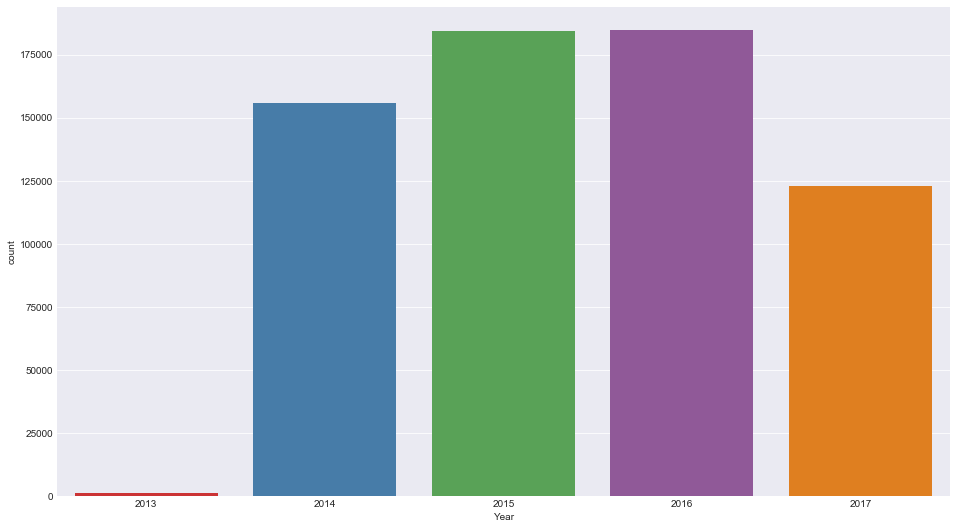

In [241]:
plt.figure(figsize = (16,9))
sns.countplot(data = trips, x = 'Year', palette= 'Set1',)

## Passengers by the month

What month has the highest patronage from the cyclists?

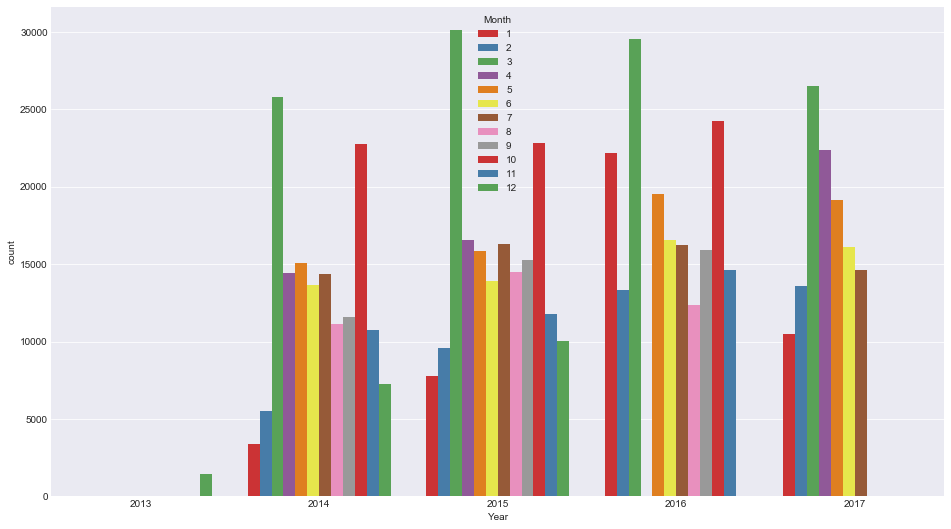

In [242]:
plt.figure(figsize = (16,9))
sns.countplot(data = trips, hue = 'Month',x = 'Year', palette='Set1')

Accross the years, the month of March has always been the highest in terms of patronage when compared to other months, with October coming in a close second, this shows periods of increased bicycle aupply need at the different stations.

## Passengers by the day of the month

What day of the month has the most passengers?

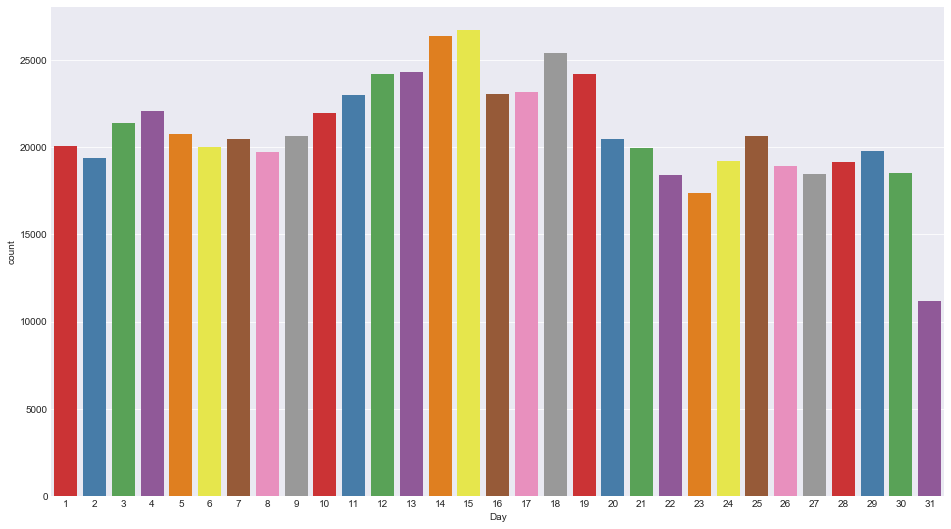

In [243]:
plt.figure(figsize = (16,9))
sns.countplot(data = trips, x = 'Day', palette='Set1', orient='v')

The 15th day of each month tends to see the highest patronage.

In [244]:
#plt.figure(figsize = (16,9))
#sns.factorplot(data = trips, x = 'Day' ,row = 'Month', palette='Set1', kind = 'count',size = 6, aspect = 4 )

In [245]:
trips.columns

Index(['bikeid', 'checkout_time', 'duration_minutes', 'end_station_name',
       'start_station_name', 'subscriber_type', 'trip_id', 'Exact Time',
       'Day of week', 'Name of Day of Week', 'Year', 'Month', 'Day',
       'Hour of day', 'Minute of hour', 'Start Station ID Adjusted',
       'End Station ID Adjusted'],
      dtype='object')

## Passengers by the day of the week

What day of the week has the highest customers?

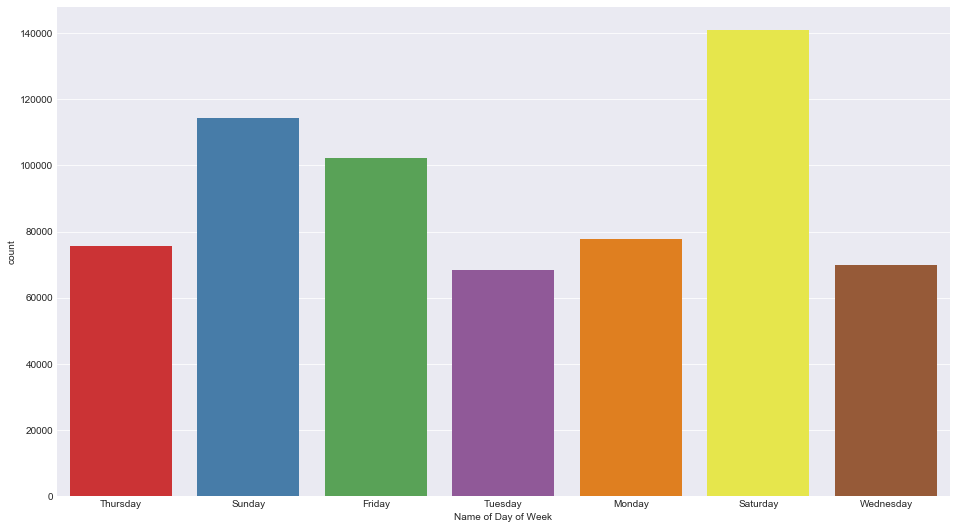

In [246]:
plt.figure(figsize = (16,9))
sns.countplot(data = trips, x = 'Name of Day of Week', palette='Set1', )

Across the years, Saturday has the most customers, next to Sunday and next to Friday. This suggests that most cyclists in Austin cycle for leisure and not as a major means of transportation.

Is this trend consistent across the years?

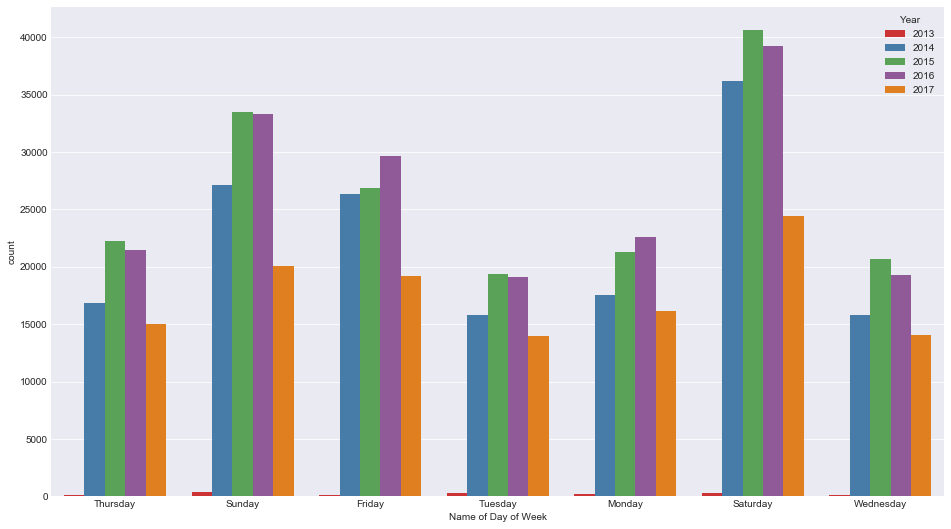

In [247]:
plt.figure(figsize = (16,9))
sns.countplot(data = trips, hue = 'Year',x = 'Name of Day of Week', palette='Set1', )

Does the trend persist on a monthly basis? We can investiaget that with just a few lines of code.

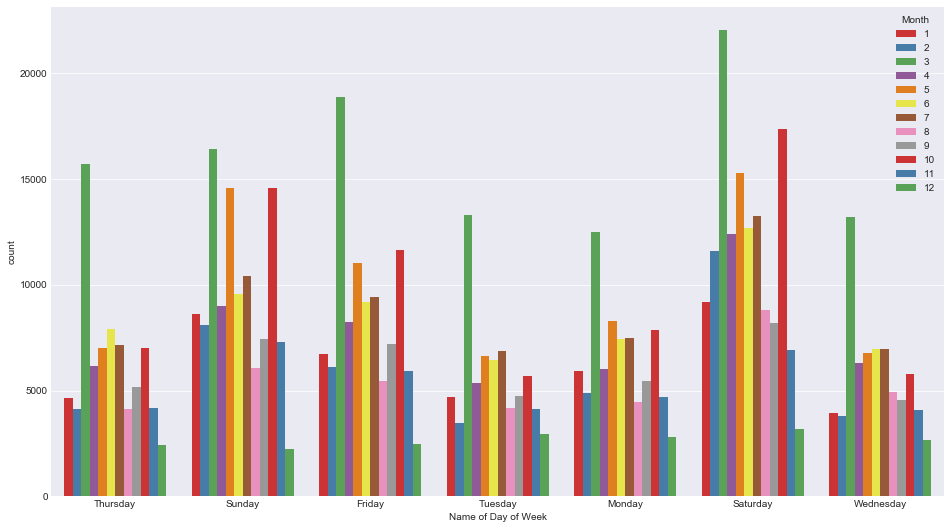

In [248]:
plt.figure(figsize = (16,9))
sns.countplot(data = trips, hue = 'Month',x = 'Name of Day of Week', palette='Set1', )

Generally speaking, the trend continues even when we analyse the data oon the timescale of months. However, there are some noticeable changes, there seems to be more activities during the weekdays in the month of March only. A possible explanation for this trend could be the cycling competiton which holds in March. 

In conclusion, cycling is a leisure activity in Austin.

## Passengers by the hour of the day

What hour of the day has the most customers?

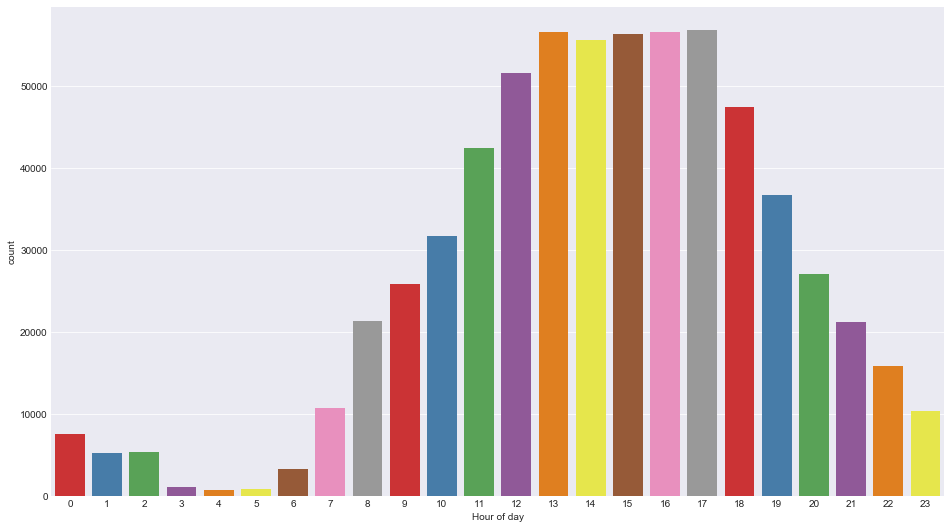

In [249]:
plt.figure(figsize = (16,9))
sns.countplot(data = trips, x ='Hour of day' , palette='Set1', )

Accross the years, the hours of 12 noon till 6pm (18:00 hr) are the peak periods in terms of demand. The hours with the least patronage is from 12 midnight till 7am. The demand increases steadily from 6am till it reaches a maximum at 1pm (13:00 hr). We can conclude from this that bicycles are used for leisure more than they are used to getting to wok early in the morning.

Does this trend continue accross the years?

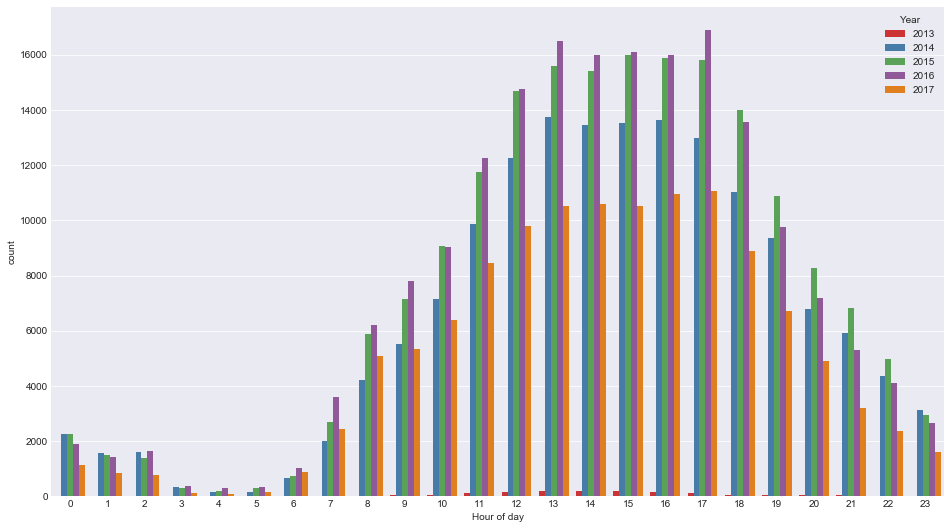

In [250]:
plt.figure(figsize = (16,9))
sns.countplot(data = trips, x ='Hour of day' ,hue = 'Year', palette='Set1', )

Yes it does.
How about across the month?

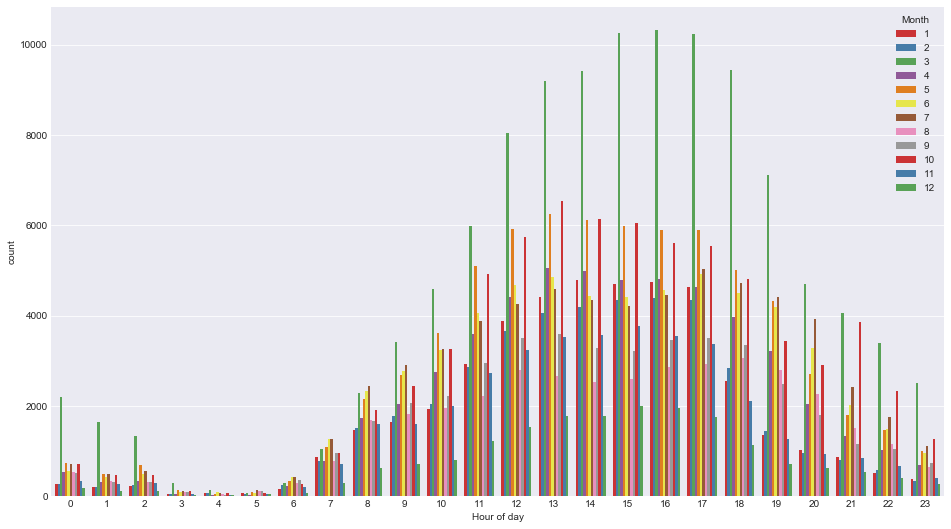

In [251]:
plt.figure(figsize = (16,9))
sns.countplot(data = trips, x ='Hour of day' ,hue = 'Month', palette='Set1', )

Surprisingly it does!

## Distribution of travel time

How does the amount of time differ among the different rentals?

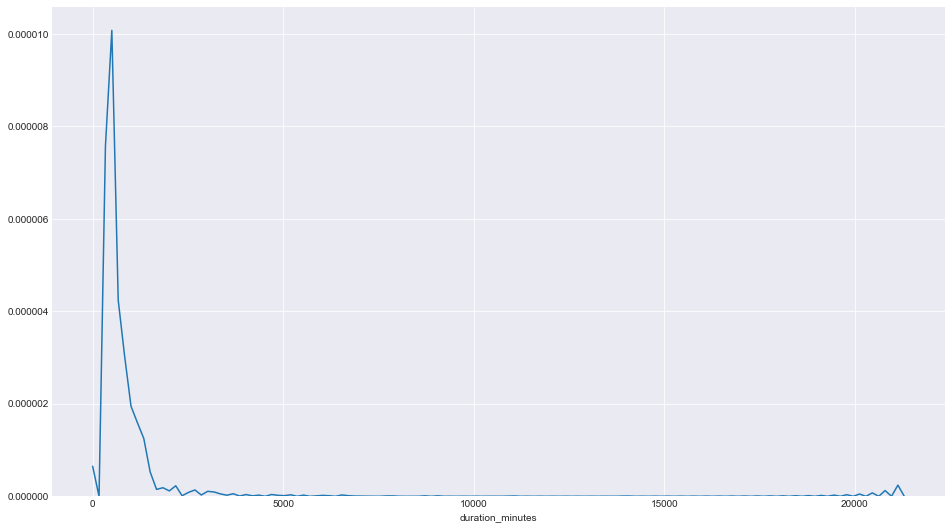

In [252]:
plt.figure(figsize = (16,9))
sns.distplot(a = trips['duration_minutes'],bins = 100, hist = False )

Not a particularly useful plot...

## Passengers by subscription type

What subscription types are the most popular?

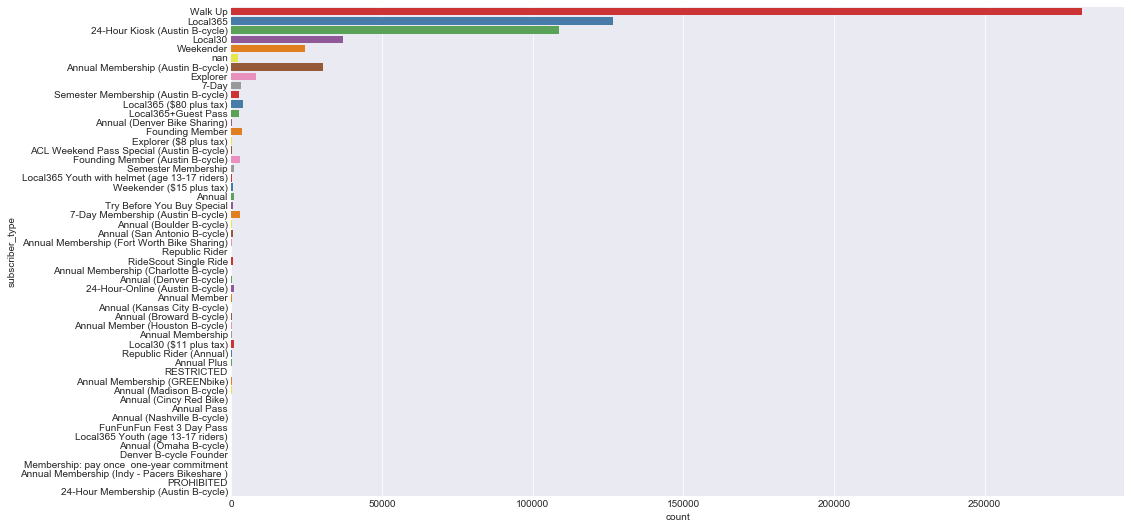

In [253]:

plt.figure(figsize = (16,9))
sns.countplot(data = trips, y ='subscriber_type' , palette='Set1', )

The vast majority of subscriptions are those of walk up format, which means the customers just rent it on a need basis. This serves to buttress the point that cycling is done for leisure in Austin.

## Station status

The different stations in the dataset can be of any of the four statuses - Active, Closed, Moved or ACL only. Lets see the relative amount of each.

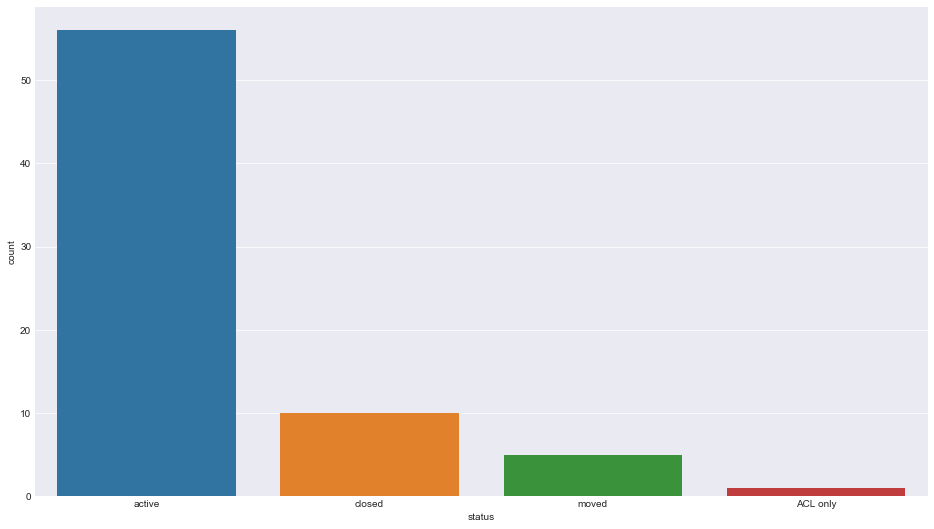

In [254]:
plt.figure(figsize = (16,9))
sns.countplot(data = stations, x = 'status')

## Passengers by Start and End Station

In [255]:
trips['Counter']= 1
StartStation_Count = trips[['start_station_name', 'Counter']]
StartStation_Count=StartStation_Count.groupby(by = 'start_station_name').sum()
StartStation_Count.sort_values(by = 'Counter' ,axis = 0, ascending = False, inplace = True)

In [256]:
# What are the top 20 busiest bicycle Start stations?
StartStation_Count.head(20)

,Counter
start_station_name,
Riverside @ S. Lamar,28695
City Hall / Lavaca & 2nd,28535
5th & Bowie,26669
2nd & Congress,26612
4th & Congress,24972
Convention Center / 4th St. @ MetroRail,24357
Rainey St @ Cummings,23468
Davis at Rainey Street,22273
Capitol Station / Congress & 11th,20056


In [257]:
StartTop20 = StartStation_Count.head(20)

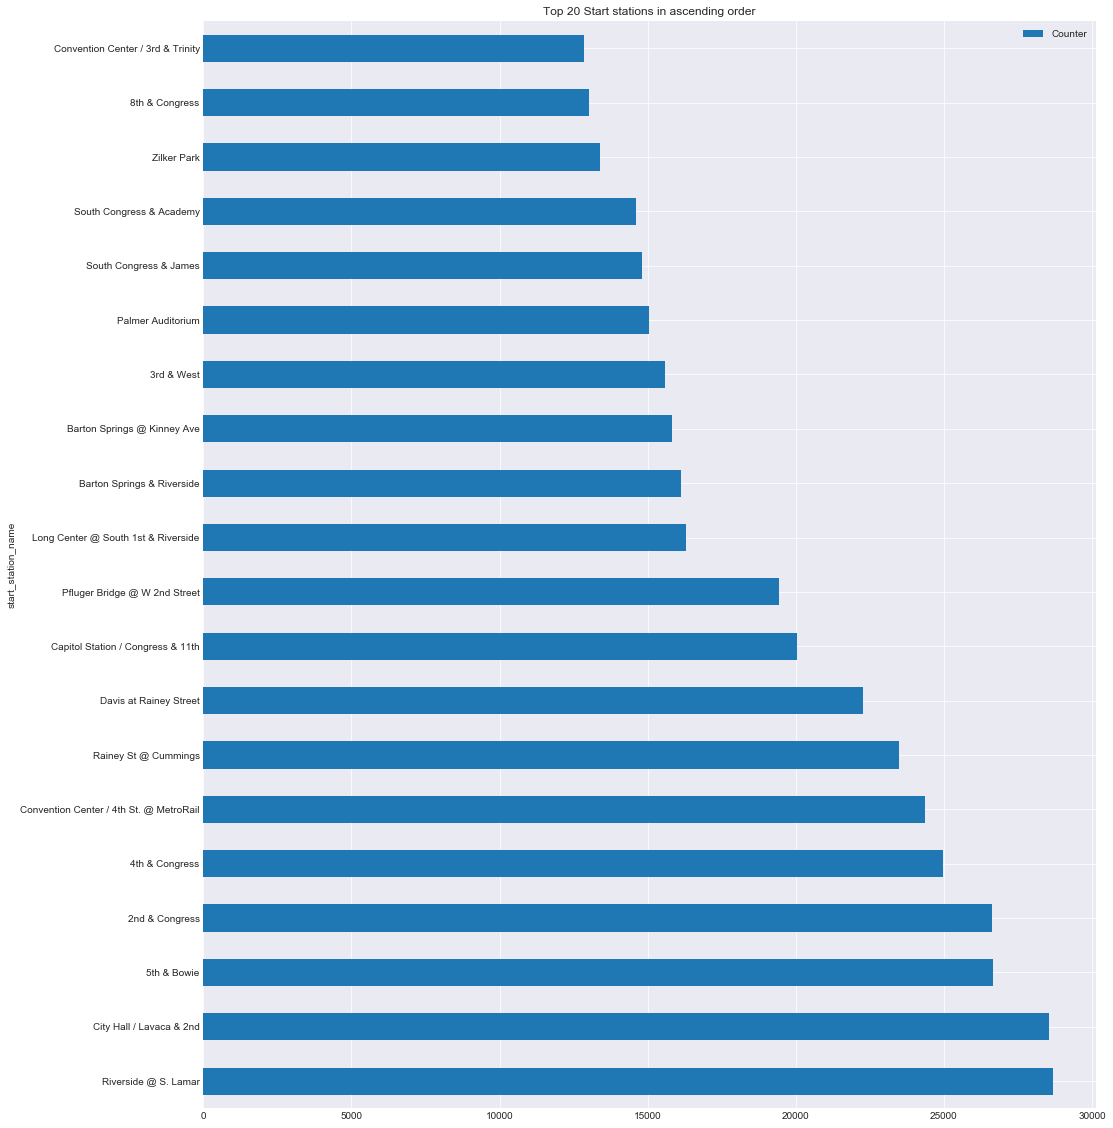

In [258]:
StartTop20.plot(kind = 'barh', sort_columns=True, figsize = (16,20), title= 'Top 20 Start stations in ascending order')

## End station

In [259]:
EndStation_Count = trips[['end_station_name', 'Counter']]
EndStation_Count=EndStation_Count.groupby(by = 'end_station_name').sum()
EndStation_Count.sort_values(by = 'Counter' ,axis = 0, ascending = False, inplace = True)

In [260]:
# What are the top 20 busiest bicycle End stations?
EndStation_Count.head(20)

,Counter
end_station_name,
City Hall / Lavaca & 2nd,33125
2nd & Congress,29516
Riverside @ S. Lamar,28023
4th & Congress,27902
Convention Center / 4th St. @ MetroRail,26862
5th & Bowie,25070
Rainey St @ Cummings,22696
Davis at Rainey Street,21916
Pfluger Bridge @ W 2nd Street,18632


In [261]:
EndTop20 = StartStation_Count.head(20)

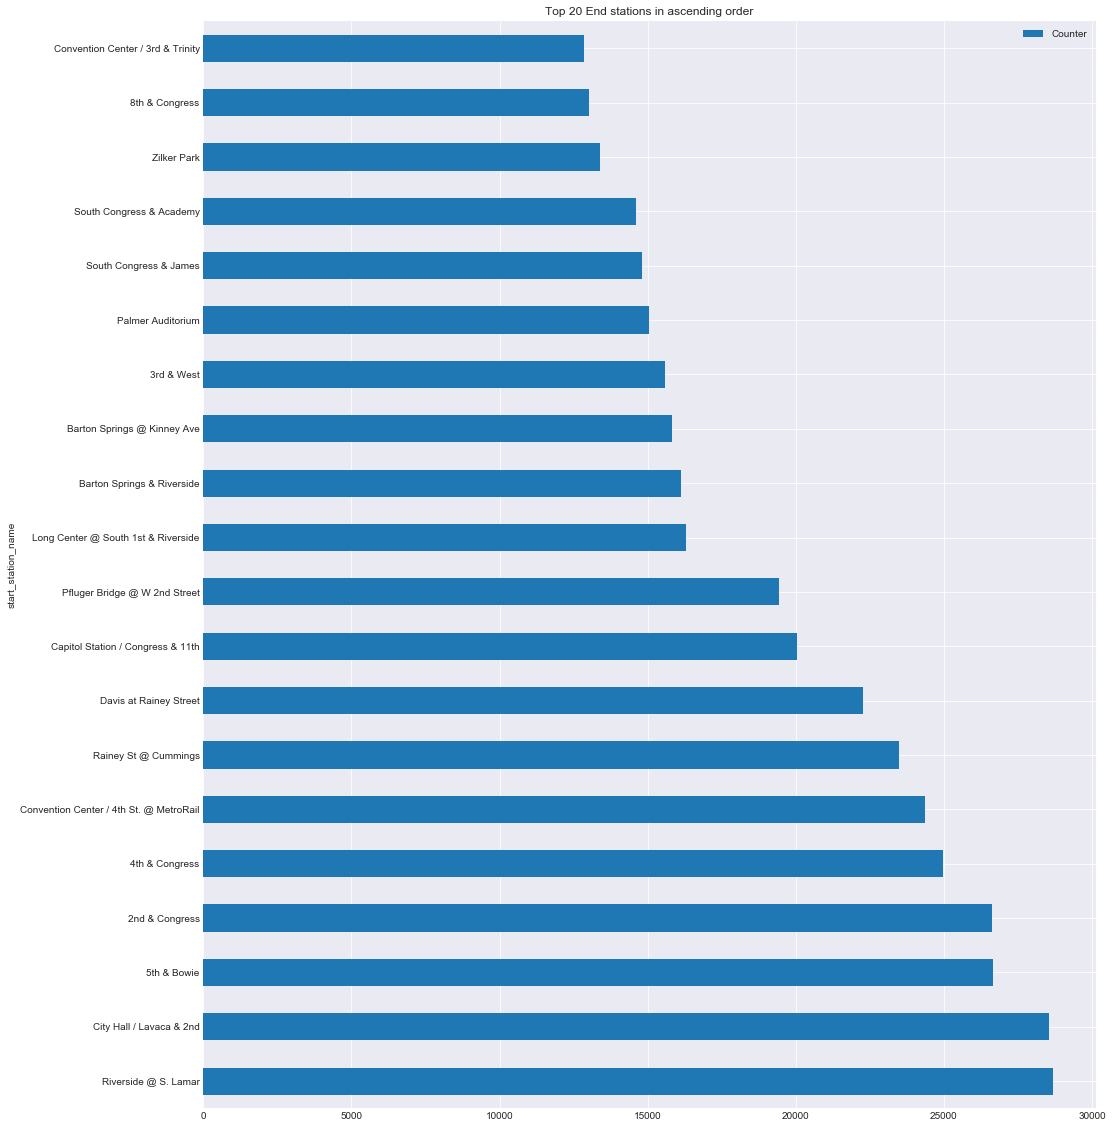

In [262]:
EndTop20.plot(kind = 'barh', sort_columns=True, figsize = (16,20), title= 'Top 20 End stations in ascending order')

## Passengers by Travel Route

In [263]:
trips['Travel Route'] = trips['start_station_name'] +' to '+ trips['end_station_name']

In [264]:
trips.head(2)

,bikeid,checkout_time,duration_minutes,end_station_name,start_station_name,subscriber_type,trip_id,Exact Time,Day of week,Name of Day of Week,Year,Month,Day,Hour of day,Minute of hour,Start Station ID Adjusted,End Station ID Adjusted,Counter,Travel Route
0,8.0,19:12:00,41,Trinity & 6th Street,Waller & 6th St.,Walk Up,9900082882,2015-03-19 19:12:00,3,Thursday,2015,3,19,19,12,2536.0,2565.0,1,Waller & 6th St. to Trinity & 6th Street
1,141.0,2:06:04,6,South Congress & Academy,2nd & Congress,Local365,12617682,2016-10-30 02:06:04,6,Sunday,2016,10,30,2,6,2494.0,2570.0,1,2nd & Congress to South Congress & Academy


In [265]:
RouteCount = trips[['Travel Route', 'Counter', 'duration_minutes']]

In [266]:
RouteCount.head()

,Travel Route,Counter,duration_minutes
0,Waller & 6th St. to Trinity & 6th Street,1,41
1,2nd & Congress to South Congress & Academy,1,6
2,Bullock Museum @ Congress & MLK to Convention ...,1,13
3,Capitol Station / Congress & 11th to Toomey Rd...,1,80
4,Rainey St @ Cummings to MoPac Pedestrian Bridg...,1,25


In [267]:
Routegroup = RouteCount.groupby(by='Travel Route').sum()

In [268]:
Routegroup['Duration in Hours'] = Routegroup['duration_minutes']/ 60

In [269]:
Routegroup.head()

,Counter,duration_minutes,Duration in Hours
Travel Route,,,
11th & San Jacinto to 11th & San Jacinto,277,12849,214.150000
11th & San Jacinto to 13th & San Antonio,2,41,0.683333
11th & San Jacinto to 17th & Guadalupe,37,765,12.750000
11th & San Jacinto to 2nd & Congress,67,1528,25.466667
11th & San Jacinto to 3rd & West,23,256,4.266667


In [270]:
Routegroup.sort_values(by = 'Counter', ascending=False, inplace= True)

In [271]:
Routegroup

,Counter,duration_minutes,Duration in Hours
Travel Route,,,
Riverside @ S. Lamar to Riverside @ S. Lamar,8418,413153,6885.883333
Rainey St @ Cummings to Rainey St @ Cummings,5691,317614,5293.566667
2nd & Congress to 2nd & Congress,4336,279752,4662.533333
City Hall / Lavaca & 2nd to City Hall / Lavaca & 2nd,4335,253858,4230.966667
Capitol Station / Congress & 11th to Capitol Station / Congress & 11th,3644,160541,2675.683333
Zilker Park to Zilker Park,3631,193337,3222.283333
Pfluger Bridge @ W 2nd Street to Pfluger Bridge @ W 2nd Street,3483,178127,2968.783333
Zilker Park at Barton Springs & William Barton Drive to Zilker Park at Barton Springs & William Barton Drive,3362,168681,2811.350000
Barton Springs & Riverside to Barton Springs & Riverside,3009,196289,3271.483333


Text(0,0.5,'Duration in Hours')

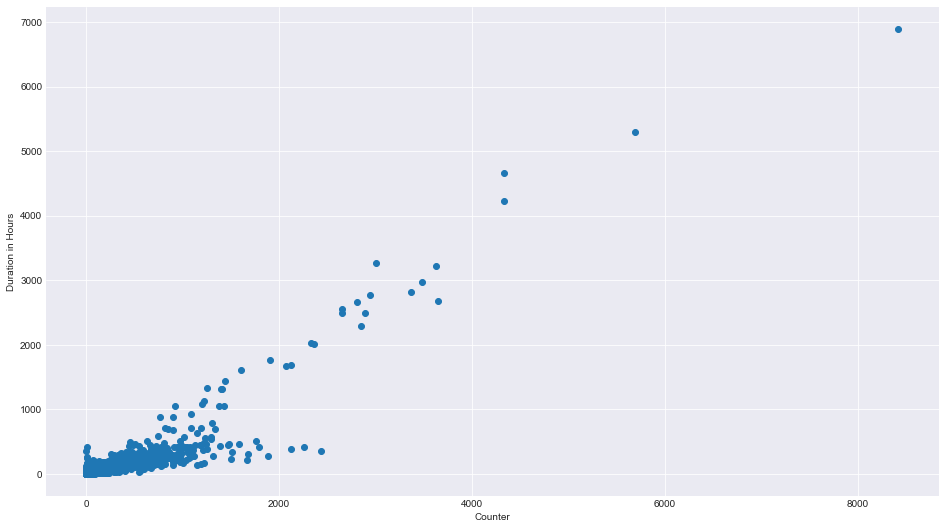

In [273]:
plt.figure(figsize = (16,9))
plt.scatter(x = Routegroup['Counter'],y = Routegroup['Duration in Hours'] )
plt.xlabel('Counter')
plt.ylabel('Duration in Hours')

In [274]:
Top20Routes = Routegroup.head(20)

In [275]:
Top20Routes

,Counter,duration_minutes,Duration in Hours
Travel Route,,,
Riverside @ S. Lamar to Riverside @ S. Lamar,8418,413153,6885.883333
Rainey St @ Cummings to Rainey St @ Cummings,5691,317614,5293.566667
2nd & Congress to 2nd & Congress,4336,279752,4662.533333
City Hall / Lavaca & 2nd to City Hall / Lavaca & 2nd,4335,253858,4230.966667
Capitol Station / Congress & 11th to Capitol Station / Congress & 11th,3644,160541,2675.683333
Zilker Park to Zilker Park,3631,193337,3222.283333
Pfluger Bridge @ W 2nd Street to Pfluger Bridge @ W 2nd Street,3483,178127,2968.783333
Zilker Park at Barton Springs & William Barton Drive to Zilker Park at Barton Springs & William Barton Drive,3362,168681,2811.350000
Barton Springs & Riverside to Barton Springs & Riverside,3009,196289,3271.483333


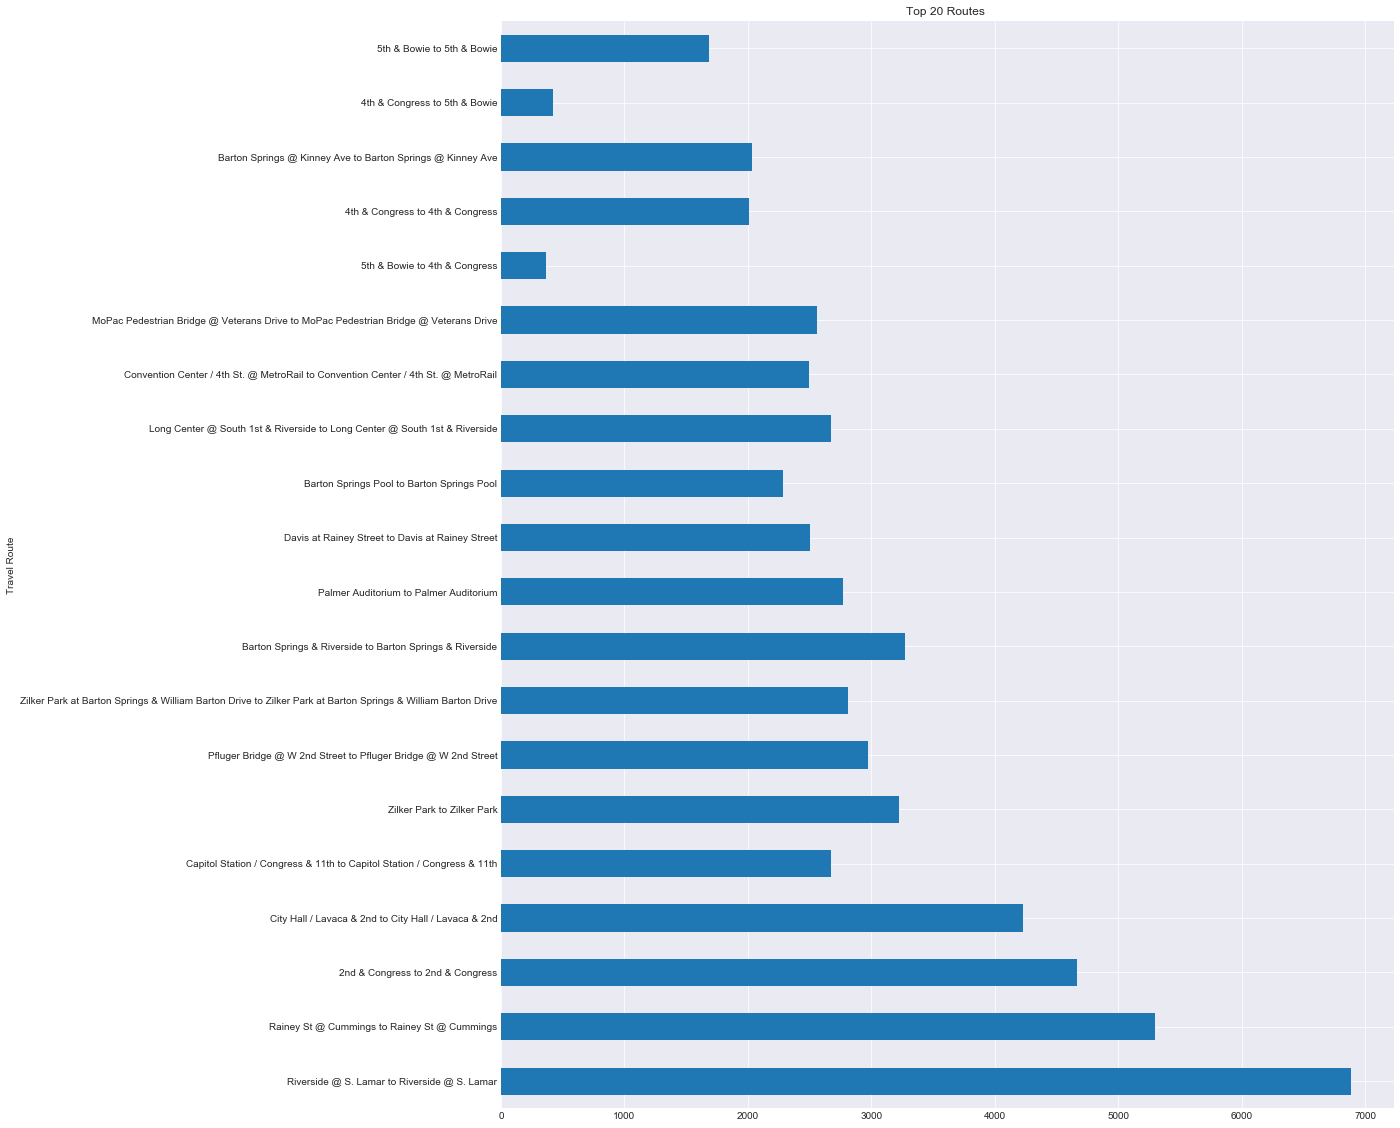

In [291]:
Top20Routes['Duration in Hours'].plot(kind = 'barh', 
                                      sort_columns=True, figsize = (16,20), title= 'Top 20 Routes ')